### 线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

In [2]:
path = '/home/blueberry/data/slr05.xls'

#### 数据加载

In [3]:
book = xlrd.open_workbook(path,encoding_override = 'utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1,sheet.nrows)])
n_samples = sheet.nrows - 1

In [10]:
data

array([[   6.2,   29. ],
       [   9.5,   44. ],
       [  10.5,   36. ],
       [   7.7,   37. ],
       [   8.6,   53. ],
       [  34.1,   68. ],
       [  11. ,   75. ],
       [   6.9,   18. ],
       [   7.3,   31. ],
       [  15.1,   25. ],
       [  29.1,   34. ],
       [   2.2,   14. ],
       [   5.7,   11. ],
       [   2. ,   11. ],
       [   2.5,   22. ],
       [   4. ,   16. ],
       [   5.4,   27. ],
       [   2.2,    9. ],
       [   7.2,   29. ],
       [  15.1,   30. ],
       [  16.5,   40. ],
       [  18.4,   32. ],
       [  36.2,   41. ],
       [  39.7,  147. ],
       [  18.5,   22. ],
       [  23.3,   29. ],
       [  12.2,   46. ],
       [   5.6,   23. ],
       [  21.8,    4. ],
       [  21.6,   31. ],
       [   9. ,   39. ],
       [   3.6,   15. ],
       [   5. ,   32. ],
       [  28.6,   27. ],
       [  17.4,   32. ],
       [  11.3,   34. ],
       [   3.4,   17. ],
       [  11.9,   46. ],
       [  10.5,   42. ],
       [  10.7,   43. ],


#### 描述输出

In [11]:
X = tf.placeholder(tf.float32,name = 'X')
Y = tf.placeholder(tf.float32,name = 'Y')

#### 参数定义

In [12]:
w = tf.Variable(0.0 , name = 'weights')
b = tf.Variable(0.0 , name = 'bias')

#### 定义流程

In [13]:
Y_predict = X * w + b

#### 定义loss

In [14]:
loss = tf.square(Y - Y_predict,name = 'loss')

#### 优化选项

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

#### 开始训练

In [16]:
x_plt = []
y_plt = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100): ##epoches
        for x,y in data:
            sess.run(optimizer,feed_dict = {X:x,Y:y})
            x_plt.append(x)
            y_plt.append(y)
    w_value,b_value = sess.run([w,b])

In [17]:
(w_value,b_value)

(1.8515309, 14.252729)

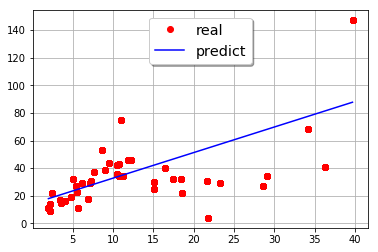

In [27]:
plt.plot(x_plt,y_plt,'ro',color='red',label='real')

x_min = min(x_plt)
x_max = max(x_plt)
x = np.arange(x_min, x_max, (x_max-x_min)/1000)
y = w_value*x+b_value
plt.plot(x,y,color = 'blue',label = 'predict')


#图例
plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.grid(True)

#显示
plt.show()